<a href="https://colab.research.google.com/github/leemijung/Deep_Learning/blob/main/%EC%8B%A4%EC%8A%B5_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 라이브러리 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

2. MNIST test dataset 가져오기

In [ ]:
# "": 현재 폴터에 MNIST 있음
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(), #test용
                      target_transform=None, download=True)

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


3. 대략적인 데이터 형태

mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 7


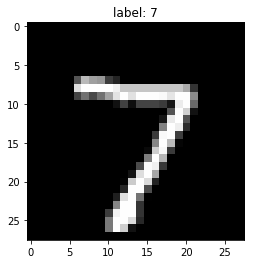

In [ ]:
print "mnist_test 길이:", len(mnist_test)

#데이터 하나의 형태
image, label=mnist_test.__getitem__(0) #0번째 데이터
print "image data 형태:", image.size()
print "label:", label

#그리기
img=image.numpy() #image 타입을 numpy 타입으로 변환 (그리기 위해) (1, 28, 28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

4. sigmiod, softmax 함수 구현

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    e_x=np.exp(x)
    return e_x/np.exp(e_x)

5. 모델 선언

In [ ]:
# Multi-layered perceptron
# # of units in each later: [28*28 -- 256 -- 128 -- 10]
class MyMLP:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        # W^(1): layer1 -> layer2 에 매핑되는 가중치
        self.W1=np.zeros((n_hidden1, n_input), dtype=np.float32) #W1(256, 28*28)
        self.b1=np.zeros((n_hidden1), dtype=np.float32)
        
        self.W2=np.zeros((n_hidden2, n_hidden1), dtype=np.float32) #W2(128, 256)
        self.b2=np.zeros((n_hidden2), dtype=np.float32)
        
        self.W3=np.zeros((n_output, n_hidden2), dtype=np.float32) #W3(10, 128)
        self.b3=np.zeros((n_output), dtype=np.float32)
        
    def __call__(self, x):
        # (1, 28, 28) -> (28, 28)
        x=x.reshape(-1) # 일렬로 피기
        
        h1=sigmoid(np.dot(self.W1, x)+self.b1) # W1(256, 28*28), x(28*28), b1(256) -> h1(256)
        h2=np.dot(self.W2, h1)+self.b2 # W1(128, 256), x(256), b2(128) -> h2(128)
        out=np.dot(self.W3, h2)+self.b3 # W1(10, 128), x(128), b1(10) -> h1(10)
        
        return softmax(out) # (10)
    

6. 모델 생성

In [ ]:
model=MyMLP(28*28, 256, 128, 10)

In [ ]:
print model.W1.shape, model.b1.shape
print model.W2.shape, model.b2.shape
print model.W3.shape, model.b3.shape

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


7. 미리 학습된 weight 로드

In [ ]:
weights=np.load('./nets/mlp_weight.npz')
model.W1=weights['W1']
model.b1=weights['b1']
model.W2=weights['W2']
model.b2=weights['b2']
model.W3=weights['W3']
model.b3=weights['b3']

print model.W1.shape, model.b1.shape
print model.W2.shape, model.b2.shape
print model.W3.shape, model.b3.shape

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


8. 테스트

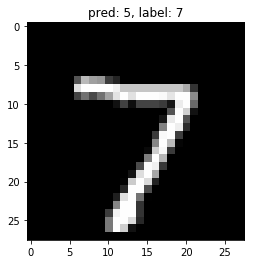

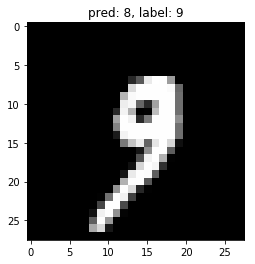

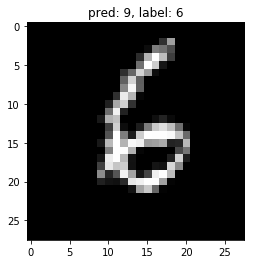

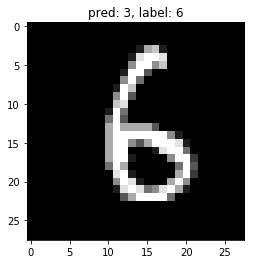

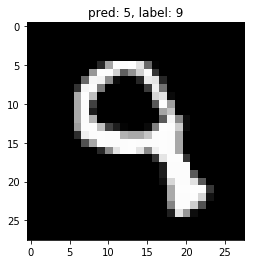

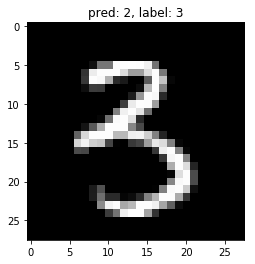

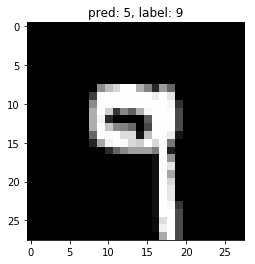

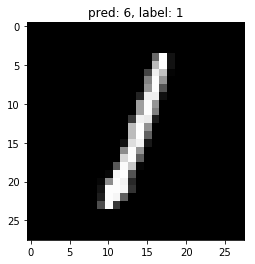

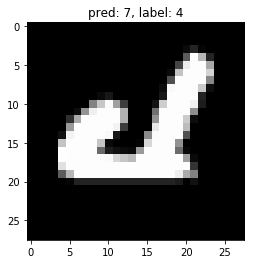

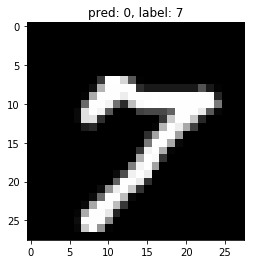

정확도: 0.23


In [ ]:
mysum=0

m=len(mnist_test) #m은 만개
cnt=0 #카운드
for i in range(m):
    image, label=mnist_test.__getitem__(i) #0번째 데이터
    output=model(image)
    
    if(i%1000==0):
        img=image.numpy() #image 타입을 numpy 타입으로 변환 (1, 28, 28)
        pred_label=np.argmax(output)
        plt.title("pred: %d, label: %d" %(pred_label, label) )
        plt.imshow(img[0], cmap='gray')
        plt.show()
    
    cnt+=1
    mysum+=(np.argmax(output)==label)
print "정확도: %.2f" %((float(mysum)/cnt)*100.0)